<h1>credit risk probability model for alternative data</h1>

<h4>Explanatory Data Analysis</h4>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/raw/data.csv")
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
df["ProductCategory"].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

In [7]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


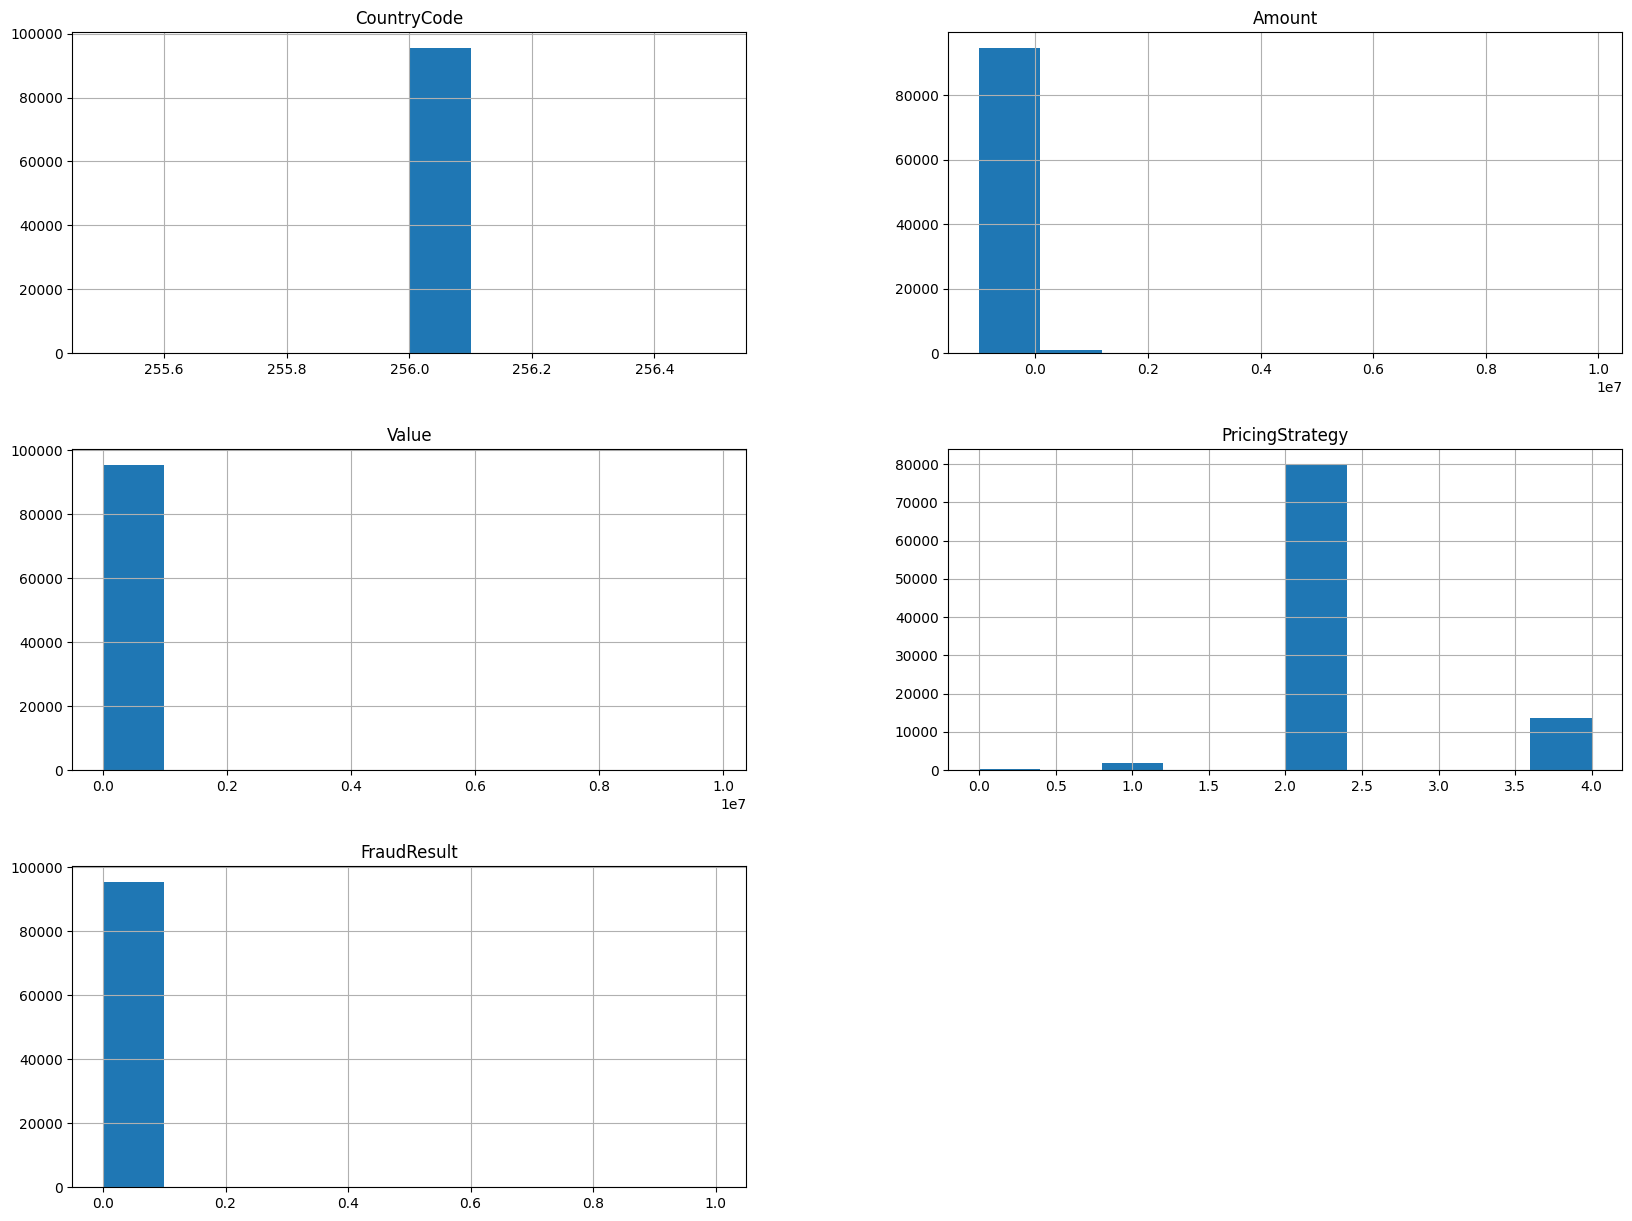

In [14]:
df.hist(figsize=(20,15), bins=10)
plt.show()

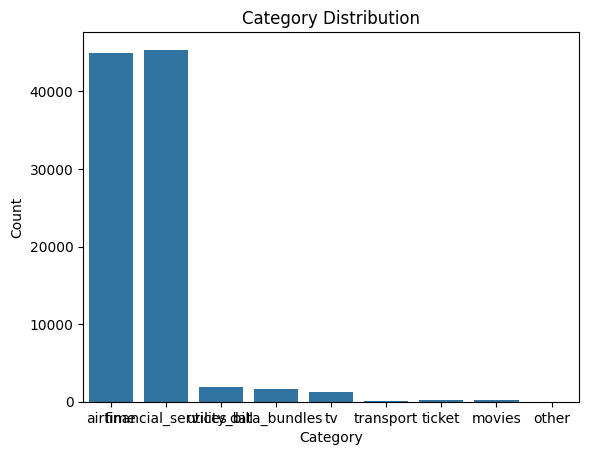

In [36]:
sns.countplot(x='ProductCategory', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

In [37]:
df.dropna

<bound method DataFrame.dropna of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX       

<h4>outlier detection</h4>

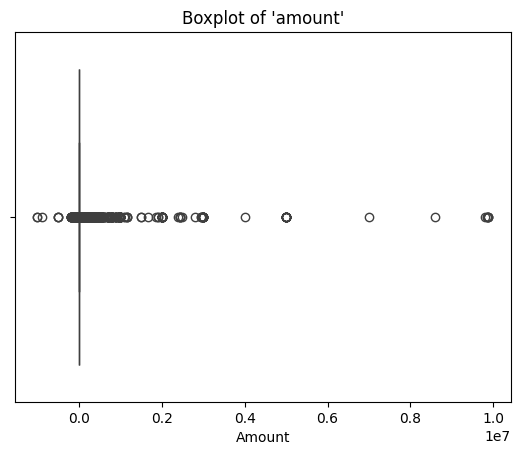

In [38]:
# Visualize with a boxplot
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of 'amount'")
plt.show()


<h4> correlational analysis </h4>

In [41]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


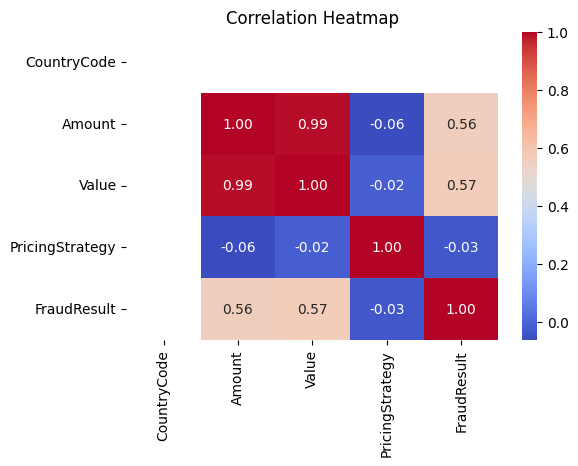

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()